In [1]:
from __future__ import annotations

import jax
from loguru import logger

from jaxarc.parsers.arc_agi import ArcAgiParser
from jaxarc.utils.config import get_config
from jaxarc.utils.visualization import (
    draw_grid_svg,
    draw_parsed_task_data_svg,
    draw_task_pair_svg,
    visualize_parsed_task_data_rich,
    visualize_task_pair_rich,
)

In [2]:
cfg = get_config()

environment_config = cfg.dataset
# environment_config.default_split = "evaluation"

parser = ArcAgiParser(
    cfg=environment_config,
)

dataset_name = environment_config.dataset_name
dataset_year = environment_config.dataset_year

logger.info(f"Dataset: {dataset_name} ({dataset_year})")
logger.info(f"Description: {environment_config.description}")
logger.info(f"Available tasks: {len(parser.get_available_task_ids())}")

2025-06-24 10:31:05.601 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:71 - Loaded 1000 tasks from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2025/arc-agi_training_challenges.json
2025-06-24 10:31:05.614 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:85 - Loaded solutions from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2025/arc-agi_training_solutions.json
2025-06-24 10:31:05.616 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:109 - Cached 1000 tasks in memory
2025-06-24 10:31:05.616 | INFO     | __main__:<module>:13 - Dataset: ARC-AGI-2 (2025)
2025-06-24 10:31:05.617 | INFO     | __main__:<module>:14 - Description: ARC-AGI-2 dataset (2025) for abstract reasoning tasks
2025-06-24 10:31:05.617 | INFO     | __main__:<module>:15 - Available tasks: 1000


In [3]:
# Get a random task
key = jax.random.PRNGKey(42)
try:
    parsed_task = parser.get_random_task(key)
    logger.info(f"Successfully parsed task: {parsed_task.task_index}")
    logger.info(f"Number of training pairs: {parsed_task.num_train_pairs}")
    logger.info(f"Number of test pairs: {parsed_task.num_test_pairs}")
    logger.info(f"Input grids shape: {parsed_task.input_grids_examples.shape}")
    logger.info(f"Output grids shape: {parsed_task.output_grids_examples.shape}")
    logger.info(f"Test input grids shape: {parsed_task.test_input_grids.shape}")
except Exception as e:
    logger.error(f"Error parsing task: {e}")
    raise

2025-06-24 10:31:06.411 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:201 - Task 0b148d64: 3 train pairs, 1 test pairs, max grid size: 21x21
2025-06-24 10:31:06.412 | DEBUG    | jaxarc.utils.task_manager:get_global_task_manager:236 - Created global task ID manager
2025-06-24 10:31:06.412 | DEBUG    | jaxarc.utils.task_manager:register_task:72 - Registered task '0b148d64' with index 0
2025-06-24 10:31:06.413 | INFO     | __main__:<module>:5 - Successfully parsed task: 0
2025-06-24 10:31:06.413 | INFO     | __main__:<module>:6 - Number of training pairs: 3
2025-06-24 10:31:06.414 | INFO     | __main__:<module>:7 - Number of test pairs: 1
2025-06-24 10:31:06.414 | INFO     | __main__:<module>:8 - Input grids shape: (10, 30, 30)
2025-06-24 10:31:06.414 | INFO     | __main__:<module>:9 - Output grids shape: (10, 30, 30)
2025-06-24 10:31:06.414 | INFO     | __main__:<module>:10 - Test input grids shape: (4, 30, 30)
2025-06-24 10:31:06.412 | DEBUG    | jaxarc.utils.task_manager:get_glob

In [4]:
task_data = parser.get_task_by_id("00d62c1b")
# task_data = parser.get_task_by_id("12997ef3")

visualize_parsed_task_data_rich(
    task_data,
    show_test=True,
    show_coordinates=False,
    show_numbers=False,
    double_width=True,
)

2025-06-24 10:31:06.495 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:201 - Task 00d62c1b: 5 train pairs, 1 test pairs, max grid size: 20x20
2025-06-24 10:31:06.496 | DEBUG    | jaxarc.utils.task_manager:register_task:72 - Registered task '00d62c1b' with index 1


╭─ Task: 00d62c1b ────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                     Training Examples: 5  Test Examples: 1                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Training Examples (5) ─────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ╭────────────────────────────────────────────── Input 1 (10x10) ──────────────────────────────────────────────╮ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                        ↓                                                        │
│                                                                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Output 1 (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛ │
│ ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── │
│ ╭────────────────────────────────────────────── Input 2 (10x10) ──────────────────────────────────────────────╮ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                 

╭─ Test Examples (1) ─────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ╭─────────────────────────────────────────── Test Input 1 (20x20) ────────────────────────────────────────────╮ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ │████████████████████████████████████████                                                                     │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                        ↓                                                        │
│                                                                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Test Output 1 (20x20) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃████████████████████████████████████████                                                                     ┃ │
│ ┃████████████████████████████████████████                                                                     ┃ │
│ ┃████████████████████████████████████████                                                                     ┃ │
│ ┃████████████████████████████████████████                                                                     ┃ │
│ ┃████████████████████████████████████████                                                                     ┃ │
│ ┃████████████████████████████████████████                                                                     ┃ │
│ ┃████████████████████████████████████████       

2025-06-24 10:31:06.685 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:201 - Task 11852cab: 3 train pairs, 1 test pairs, max grid size: 10x10
2025-06-24 10:31:06.686 | DEBUG    | jaxarc.utils.task_manager:register_task:72 - Registered task '11852cab' with index 2


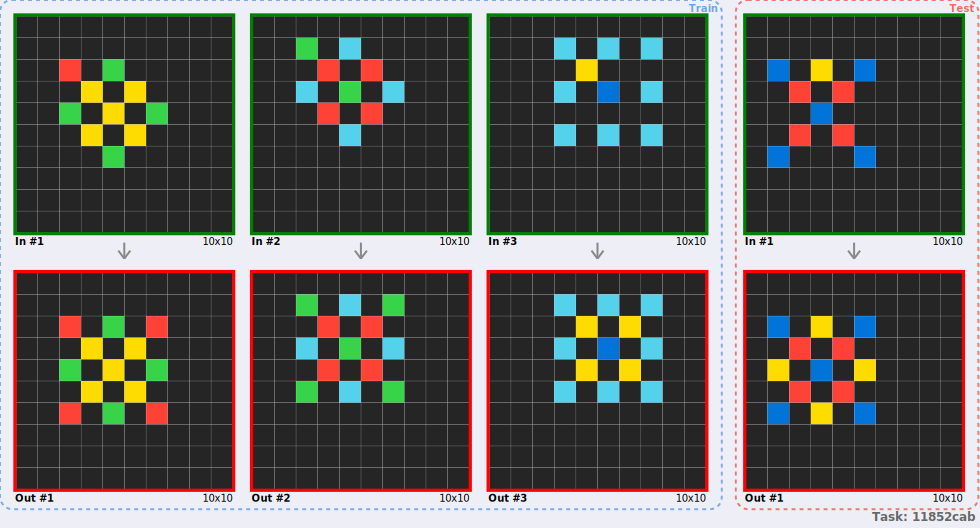

In [5]:
task_data = parser.get_random_task(jax.random.PRNGKey(69))

draw_parsed_task_data_svg(
    task_data, include_test="all", border_colors=("green", "red"), width=30, height=12
)

2025-06-24 10:29:29.475 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:201 - Task b5ca7ac4: 3 train pairs, 1 test pairs, max grid size: 22x22
2025-06-24 10:29:29.476 | DEBUG    | jaxarc.utils.task_manager:register_task:72 - Registered task 'b5ca7ac4' with index 1


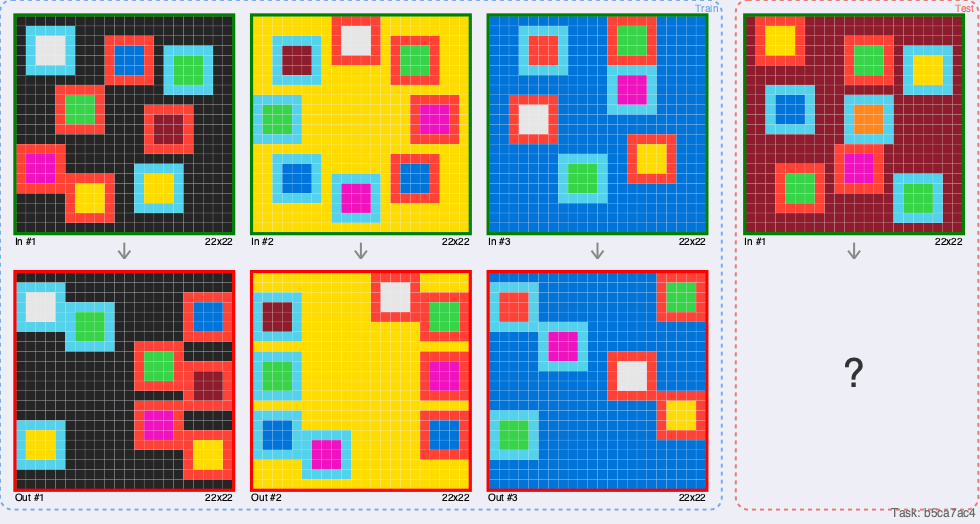

In [5]:
draw_parsed_task_data_svg(
    parser.get_task_by_id("b5ca7ac4"),
    include_test=True,
    border_colors=("green", "red"),
    width=30,
    height=12,
).rasterize()

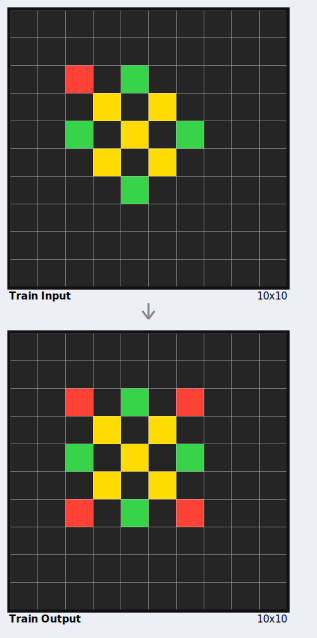

In [6]:
draw_task_pair_svg(
    task_data.input_grids_examples[0],
    task_data.output_grids_examples[0],
    task_data.input_masks_examples[0],
    task_data.output_masks_examples[0],
    width=10,
    height=15,
    label="Train",
)

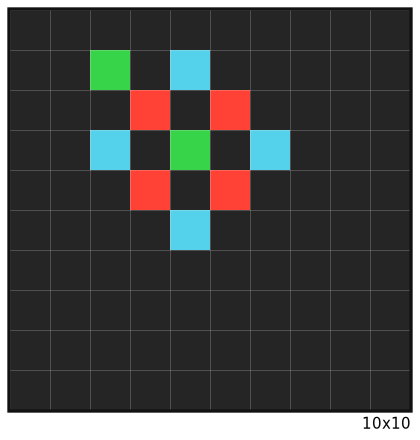

In [7]:
draw_grid_svg(
    task_data.input_grids_examples[1],
    task_data.input_masks_examples[1],
    # max_width=2,
    # max_height=2,
    # label="Train Input",
    # show_size=False,
    # extra_bottom_padding=0,
)

In [9]:
visualize_task_pair_rich(
    task_data.input_grids_examples[0],
    task_data.output_grids_examples[0],
    task_data.input_masks_examples[0],
    task_data.output_masks_examples[0],
    double_width=False,
)

╭─────────────────────────────────────────── Task Pair - Input (10x10) ───────────────────────────────────────────╮
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
│█ █ █ █ █ █ █ █ █ █                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

↓

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Task Pair - Output (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┃█ █ █ █ █ █ █ █ █ █                                                                                              ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛